In [28]:
import pandas as pd
import numpy as np
import json
import pyarrow as pa
import pyarrow.parquet as pq

## Yelp

### business 2

In [29]:
df = pd.read_csv('Datasets optimizados/Yelp/business.csv.gz', compression='gzip')

In [30]:
df[df['categories'].str.contains('Restaurant')]

,business_id,latitude,longitude,stars,categories,Estado_Perteneciente
3,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",New Jersey
5,CF33F8-E6oudUQ46HnavjQ,36.269593,-87.058943,2.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Tennessee
8,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,"Pubs, Restaurants, Italian, Bars, American (Tr...",Illinois
9,bBDDEgkFA1Otx9Lfe7BZUQ,36.208102,-86.768170,1.5,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Tennessee
11,eEOYSgkmpB90uNA7lDOMRA,27.955269,-82.456320,4.0,"Vietnamese, Food, Restaurants, Food Trucks",Florida
...,...,...,...,...,...,...
144651,w_4xUt-1AyY2ZwKtnjW0Xg,43.616590,-116.202383,4.5,"Bars, Gastropubs, Sandwiches, Nightlife, Resta...",Idaho
144653,l9eLGG9ZKpLJzboZq-9LRQ,39.925656,-75.310344,3.0,"Restaurants, Sandwiches, Convenience Stores, C...",New Jersey
144655,cM6V90ExQD6KMSU3rRB5ZA,43.615401,-116.284689,4.0,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",Idaho
144663,WnT9NIzQgLlILjPT0kEcsQ,39.935982,-75.158665,4.5,"Restaurants, Mexican",New Jersey


C:\Users\Damian\AppData\Local\Temp\ipykernel_18096\3901146235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df['Estado_Perteneciente'].value_counts(), palette = 'deep')


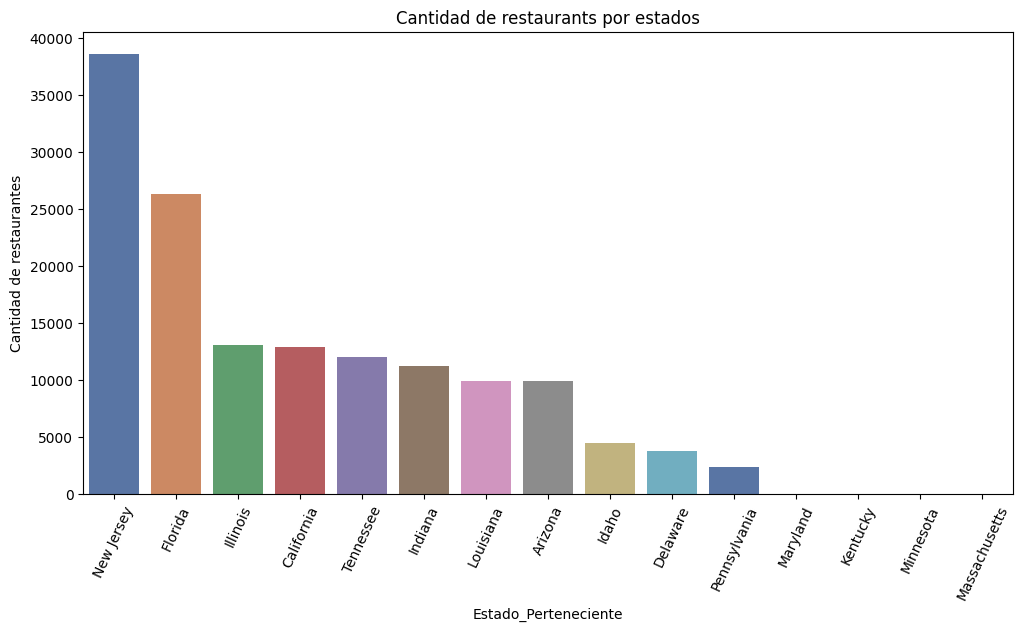

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data= df['Estado_Perteneciente'].value_counts(), palette = 'deep')
plt.xticks(rotation= 65)
plt.ylabel('Cantidad de restaurantes')
plt.title('Cantidad de restaurants por estados')
plt.show()

### Business

Contiene información del comercio, incluyendo localización, atributos y categorías.

In [47]:
businessDf = pd.read_pickle('Datasets/Yelp/business.pkl')
businessDf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
businessDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [48]:
# Hay columnas duplicadas, estas son eliminadas ya que contienen la misma informacion.

businessDf = businessDf.loc[:, ~businessDf.columns.duplicated()]

In [35]:
businessDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [36]:
# Vemos la cantidad de nulos.
businessDf.isna().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [38]:
listaCategorias = []
for categorias in businessDf['categories']:
    if categorias != None:
        for categoria in categorias.split(','):
            listaCategorias.append(categoria.strip())

valores_unicos, frecuencias = np.unique(listaCategorias, return_counts=True)

sorted(frecuencias, reverse=True)[:5]

[52268, 27781, 24395, 14356, 14292]

In [39]:
print(valores_unicos[frecuencias == 52268])
print(valores_unicos[frecuencias == 27781])
print(valores_unicos[frecuencias == 24395])
print(valores_unicos[frecuencias == 14356])
print(valores_unicos[frecuencias == 14292])

['Restaurants']
['Food']
['Shopping']
['Home Services']
['Beauty & Spas']


In [44]:
businessDf[~businessDf['state'].isna()]

In [53]:
businessDf.dropna(subset='categories', inplace=True)

In [54]:
businessDf = businessDf[businessDf['categories'].str.contains('Restaurant')]

C:\Users\Damian\AppData\Local\Temp\ipykernel_18096\1431772560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= businessDf['state'].value_counts(), palette = 'deep')


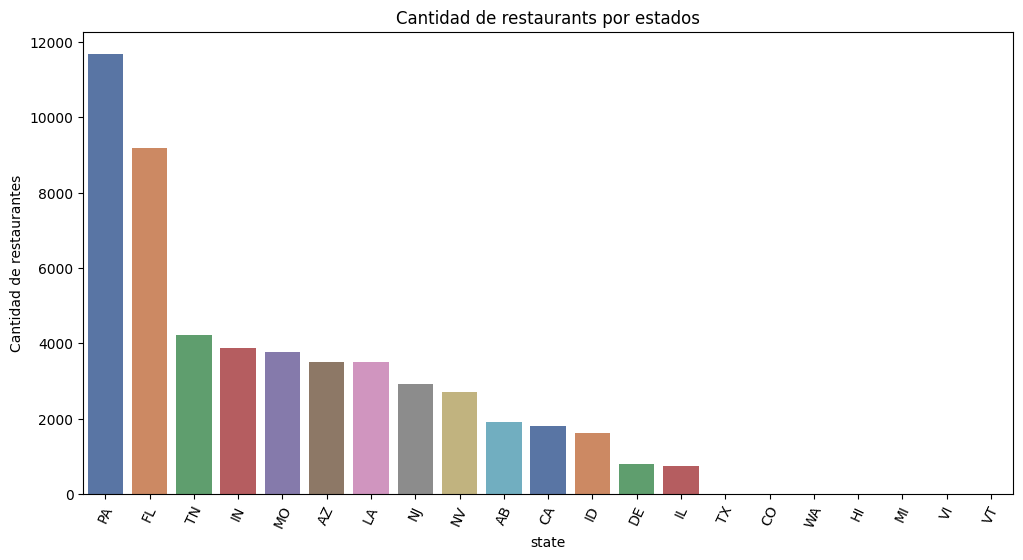

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data= businessDf['state'].value_counts(), palette = 'deep')
plt.xticks(rotation= 65)
plt.ylabel('Cantidad de restaurantes')
plt.title('Cantidad de restaurants por estados')
plt.show()

#### Restaurantes

In [28]:
restaurantes = businessDf.dropna(subset='categories')[businessDf['categories'].dropna().apply(lambda x: 'Restaurants' in x)]
restaurantes = list(restaurantes['business_id'])

### Review

Contiene las reseñas completas, incluyendo el user_id que escribió el review y el business_id por el cual se escribe la reseña.

In [29]:
# # Generamos partes de un tamaño de chunck 300000, genera 24 partes en json.
# def dividir_json_en_partes(archivo_entrada, tamaño_maximo, prefijo_salida):
#     with open(archivo_entrada, 'rb') as f_entrada:
#         # Inicializa la lista para almacenar cada parte del JSON
#         partes = []
#         numero_parte = 1

#         # Itera sobre cada línea del archivo JSON
#         for linea_binaria in f_entrada:
#             # Decodifica la línea binaria como UTF-8
#             linea = linea_binaria.decode('utf-8')

#             # Decodifica la línea como JSON
#             dato = json.loads(linea)

#             # Agrega el dato a la parte actual
#             partes.append(dato)

#             # Si la parte alcanza el tamaño máximo, guárdala y reinicia la lista
#             if len(partes) >= tamaño_maximo:
#                 guardar_parte(prefijo_salida, numero_parte, partes)
#                 numero_parte += 1
#                 partes = []

#         # Si hay datos restantes, guárdalos como la última parte
#         if partes:
#             guardar_parte(prefijo_salida, numero_parte, partes)

# def guardar_parte(prefijo_salida, numero_parte, datos):
#     nombre_salida = f"{prefijo_salida}_{numero_parte}.json"
#     with open(f'Datasets/Yelp/Pruebas/reviews_{nombre_salida}', 'w') as f_salida:
#         json.dump(datos, f_salida, indent=2)  # Puedes ajustar el nivel de indentación según tus preferencias

# # Especifica el archivo JSON de entrada, el tamaño máximo por parte y el prefijo para los archivos de salida
# archivo_entrada = 'Datasets/Yelp/review.json'
# tamaño_maximo_por_parte = 300000
# prefijo_salida = 'parte'

# # Llama a la función para dividir el JSON en partes
# dividir_json_en_partes(archivo_entrada, tamaño_maximo_por_parte, prefijo_salida)

In [30]:
# # Estos 24 json para optimizar el tamaño los pasamos a tipo parquet comprimido en gz.

# cantidad = list(range(1,25))

# def convertir_json_a_parquet(archivo_json, archivo_parquet):
#     # Lee el archivo JSON en un DataFrame de pandas
#     with open(archivo_json, 'r') as f:
#         datos_json = json.load(f)

#     # Convierte el JSON a un DataFrame de pandas
#     dataframe = pd.DataFrame(datos_json)

#     # Convierte el DataFrame de pandas a una tabla de PyArrow
#     tabla = pa.Table.from_pandas(dataframe)

#     # Escribe la tabla en un archivo Parquet
#     pq.write_table(tabla, archivo_parquet, compression='gzip')

# for i in cantidad:
#     # Especifica el archivo JSON de entrada y el archivo Parquet de salida
#     archivo_json = f'Datasets/Yelp/Pruebas/reviews_parte_{i}.json'
#     archivo_parquet = f'Datasets/Yelp/reviewsParquet/reviews_parte_{i}.gz.parquet'

#     # Llama a la función para convertir el JSON a Parquet
#     convertir_json_a_parquet(archivo_json, archivo_parquet)

In [3]:
# def analyze_sentiment(text):
#     if text is None:
#       return 1
#     sid = SentimentIntensityAnalyzer()
#     sentiment_score = sid.polarity_scores(text)["compound"]
#     return sentiment_score

# #Genero un criterio para poder definir un creterio 1:sentimiento negativo, 2:sentimiento positivo, 0:neutro
# df_result = df_result.withColumn(
#     "sentiment",
#     when((col('stars') / 5. + col("sentiment_score")) > 1.5, 2)
#     .when((col('stars') / 5. + col("sentiment_score")).between(1.0, 1.5), 0)
#     .otherwise(1)
# )

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download(['vader_lexicon', 'stopwords', 'punkt', 'names'])
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Damian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Damian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Damian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Damian\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [5]:
for i in range(1,25):
    df = pd.read_parquet(f'Datasets/Yelp/reviewsParquet/reviews_parte_{i}.gz.parquet')
    df.drop(columns=['useful', 'funny', 'cool'], inplace=True)
    print(df.isna().sum())

review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
text        

In [6]:
def puntajeNLP(x):
    if x > 1.5:
        return 2
    elif x >= 1:
        return 0
    else: 
        return 1

In [7]:
analisis = df['text'].apply(lambda x: sid.polarity_scores(x)["compound"])

valorEstrellas = df['stars'] / 5 

analisis += valorEstrellas

analisis = analisis.apply(lambda x: puntajeNLP(x))

df['text'] = analisis

df.head()

,review_id,user_id,business_id,stars,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2,2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2,2017-01-14 20:54:15


In [ ]:
cantidad = 0

for numero in range(1,25):
    df = pd.read_json(f'Datasets/Yelp/Pruebas/reviews_parte_{numero}.json')
    df[df['business_id'].apply(lambda x: x in restaurantes)]
    cantidad += df.shape[0]
    print(numero)
    
print(cantidad)

In [ ]:
df[df['business_id'].apply(lambda x: x in restaurantes)].shape[0]

### Checkin (no sirve)

In [3]:
checkinDf = pd.read_json('Datasets/Yelp/checkin.json', lines=True)
checkinDf.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


### Tip

In [4]:
tipDf = pd.read_json('Datasets/Yelp/tip.json', lines=True)
tipDf.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


### User

In [5]:
userDf = pd.read_parquet('Datasets/Yelp/user.parquet')
userDf.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
